In [1]:
!pip install opencv-python

import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.models import load_model
import pandas as pd


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_dataset = train.flow_from_directory('D:\\Data set\\train',
                                         target_size = (224,224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 21000 images belonging to 4 classes.


In [3]:
test = ImageDataGenerator(rescale=1./255)
test_dataset = test.flow_from_directory('D:\\Data set\\test',
                                         target_size = (224,224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 2900 images belonging to 4 classes.


In [4]:
train_dataset.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,BatchNormalization

In [10]:
model=Sequential()

model.add( Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(4,activation='softmax'))
model.add(BatchNormalization())

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_19 (Bat  (None, 109, 109, 64)     256       
 chNormalization)                                                
                                                      

In [13]:
callbacks = [
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),    
] 

METRICS = [
      "accuracy",
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=METRICS)

In [15]:
model_fit = model.fit(train_dataset,
                      validation_data=test_dataset,
                      epochs=80,
                      steps_per_epoch=len(train_dataset),
                      validation_steps=len(test_dataset),
                      callbacks=callbacks)

Epoch 1/80
657/657 [==============================] - 1034s 2s/step - loss: 0.9898 - accuracy: 0.5574 - precision: 0.7343 - recall: 0.3849 - auc: 0.8192 - val_loss: 0.4852 - val_accuracy: 0.8492 - val_precision: 0.9004 - val_recall: 0.7748 - val_auc: 0.9695 - lr: 0.0010
Epoch 2/80
657/657 [==============================] - 1032s 2s/step - loss: 0.6470 - accuracy: 0.7485 - precision: 0.8010 - recall: 0.6866 - auc: 0.9280 - val_loss: 0.2231 - val_accuracy: 0.9370 - val_precision: 0.9475 - val_recall: 0.9318 - val_auc: 0.9893 - lr: 0.0010
Epoch 3/80
657/657 [==============================] - 1092s 2s/step - loss: 0.4694 - accuracy: 0.8244 - precision: 0.8521 - recall: 0.7968 - auc: 0.9612 - val_loss: 0.1589 - val_accuracy: 0.9514 - val_precision: 0.9553 - val_recall: 0.9494 - val_auc: 0.9930 - lr: 0.0010
Epoch 4/80
657/657 [==============================] - 1108s 2s/step - loss: 0.3859 - accuracy: 0.8588 - precision: 0.8757 - recall: 0.8419 - auc: 0.9730 - val_loss: 0.2799 - val_accuracy:

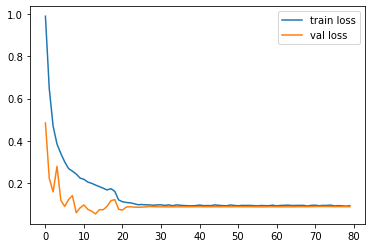

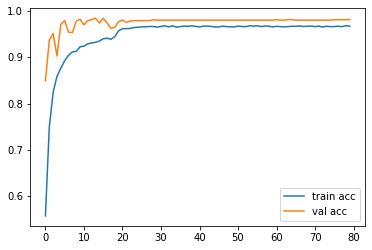

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss

plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy

plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
#SAVE

import pickle
f = open('custommodelhistory.pckl', 'wb')
pickle.dump(model_fit.history, f)
f.close()